# Data Mining Lab 1 - First HW

This file is the first assignment, which includes some code from Lab 1 as well as homework exercises.

In [1]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [3]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) 
#This command also shuffles the data randomly, but with random_state we can bring the same distribution of data everytime 
#if we choose the same number, in this case "42". This is good for us, it means we can reproduce the same results every time
#we want to run the code.

In [4]:
twenty_train.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

### **Exercise 1 (Watch Video):**  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [5]:
for i in twenty_train.data[:3]:
    print(i)

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

In [6]:
import pandas as pd
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [7]:
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
#print
X[0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


### **Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [8]:
print(X)

                                                   text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
0              comp.graphics  
1              comp.graphics  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religi

In [9]:
X_filtered = X.loc[X['category'] == '2']
len(X_filtered)

0

### Exercise 3 (Watch Video): 
Try to fetch records belonging to the sci.med category, and query every 10th record. Only show the first 5 records.

In [10]:
print(X[X['category_name']=='sci.med'].iloc[::10][:5])

                                                  text  category category_name
7    From: aldridge@netcom.com (Jacquelin Aldridge)...         2       sci.med
49   From: jimj@contractor.EBay.Sun.COM (Jim Jones)...         2       sci.med
82   From: jason@ab20.larc.nasa.gov (Jason Austin) ...         2       sci.med
118  From: rogers@calamari.hi.com (Andrew Rogers) S...         2       sci.med
142  From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...         2       sci.med


#### Exercise 4 (Watch Video):

Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.
 hint : axis parameter. Check the documentation for more information.

In [11]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

### Exercise 5 (take home)

There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.
#### hint: why .isnull() didn't work?

In [12]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [13]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

true：字串裡面有missing value，如果是非指定字串NaN,None都是

false：字串裡面沒有missing value，即使字串的名稱叫做'NaN','None'等都一樣不是missing value的定義

因此對於有指定字串的row2,3,5，都不會被isnull函數視為missing value，而對於符合定義的row0,1,4就是會顯示true


### Exercise 6 (take home):

Notice any changes from the X dataframe to the X_sample dataframe? What are they? Report every change you noticed as compared to the previous state of X. Feel free to query and look more closely at the dataframe for these changes.

In [14]:
X_sample = X.sample(n=1000, random_state=42) # Fix the random state for reproducibility
print(X_sample)

                                                   text  category  \
561   From: ray@engr.LaTech.edu (Bill Ray) Subject: ...         2   
440   From: jkellett@netcom.com (Joe Kellett) Subjec...         3   
1513  From: noring@netcom.com (Jon Noring) Subject: ...         2   
1360  From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...         3   
259   From: keith@cco.caltech.edu (Keith Allan Schne...         0   
...                                                 ...       ...   
1316  From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...         3   
592   From: sandvik@newton.apple.com (Kent Sandvik) ...         0   
1965  From: uad1126@tdc.dircon.co.uk (Robert Palmer)...         3   
363   From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...         1   
1893  From: wcsbeau@alfred.carleton.ca (OPIRG) Subje...         2   

               category_name  
561                  sci.med  
440   soc.religion.christian  
1513                 sci.med  
1360  soc.religion.christian  
259             

X的數據是所有的數據，而X_Sample是採樣的數據，這會呈現在len的不一樣   
除此之外，row print出來的數據在X中會是固定且有順序的編碼，而X_Sample因為是採樣的所以會不一樣，但如果有限制random_state的話就會每次print出來是固定的，但仍會是隨機不會是有順序（從小到大）的編碼

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

### Exercise 7 (Watch Video):

Notice that for the ylim parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

category_name
sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: count, dtype: int64


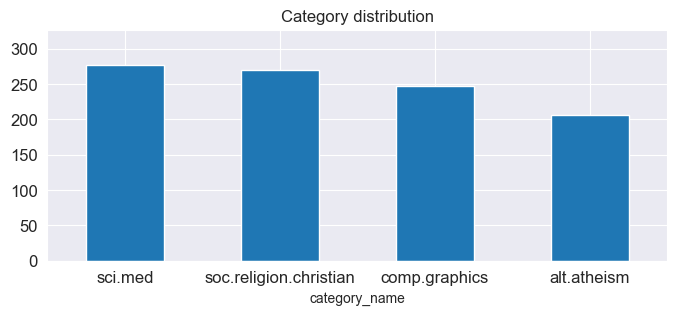

In [16]:
upper_bound = max(X_sample.category_name.value_counts() + 50)
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound],
                                           rot = 0, fontsize = 12, figsize = (8,3))

print(X_sample.category_name.value_counts())

### Exercise 8 (take home):

We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

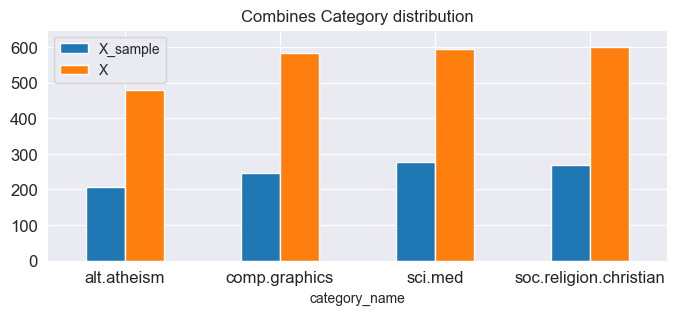

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

X_sample_counts = X_sample['category_name'].value_counts()
X_counts = X['category_name'].value_counts()

combined_counts = pd.DataFrame({
    'X_sample': X_sample_counts,
    'X': X_counts}).fillna(0)

combined_counts.plot(kind = 'bar',
                   title = 'Combines Category distribution',
                   ylim = [0, max(X_counts.max()+50, X_sample_counts.max()+50)],
                   rot = 0, fontsize = 12, figsize = (8,3))

plt.show()

In [18]:
import nltk
nltk.download('punkt_tab')
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
X[0:4]["unigrams"]

[nltk_data] Downloading package punkt_tab to /Users/aping/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


0    [From, :, sd345, @, city.ac.uk, (, Michael, Co...
1    [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....
2    [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...
3    [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...
Name: unigrams, dtype: object

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
#print(X_counts[0])

### Exercise 9 (Watch Video):

Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [20]:
analyze = count_vect.build_analyzer()
analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

### Exercise 10 (take home)

We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

text_matrix = count_vect.fit_transform(X.text)
fifth_text = text_matrix.getrow(4).toarray().flatten()

find = fifth_text.nonzero()[0]
vocabulary = count_vect.get_feature_names_out()
words_in_fifth = [vocabulary[idx] for idx in find]

print(words_in_fifth)

['00', '01', '14', '15', '1993', '22', '22824', '28246', '41', '56', '57', 'am', 'and', 'apr', 'are', 'article', 'as', 'at', 'athos', 'attend', 'believe', 'brother', 'certain', 'chose', 'christ', 'clothes', 'columbia', 'columbiasc', 'com', 'corp', 'customary', 'decision', 'died', 'edu', 'elder', 'equalivant', 'fc', 'feast', 'find', 'fnal', 'for', 'from', 'given', 'go', 'gov', 'grok11', 'heaven', 'highways', 'his', 'hmmmmmm', 'hp', 'hpfcso', 'in', 'invite', 'is', 'it', 'jesus', 'king', 'kingdom', 'like', 'lines', 'made', 'main', 'man', 'many', 'marriage', 'matt', 'ncr', 'odds', 'of', 'on', 'one', 'organization', 'our', 'parable', 'provided', 'put', 're', 'refused', 'rexlex', 'righteousness', 'rutgers', 'sc', 'shrum', 'sins', 'so', 'son', 'sounds', 'stanly', 'subject', 'tells', 'that', 'the', 'then', 'theology', 'there', 'therefore', 'this', 'those', 'to', 'unto', 'wear', 'wedding', 'were', 'when', 'which', 'who', 'writes', 'you', 'your']


#### Exercise 11

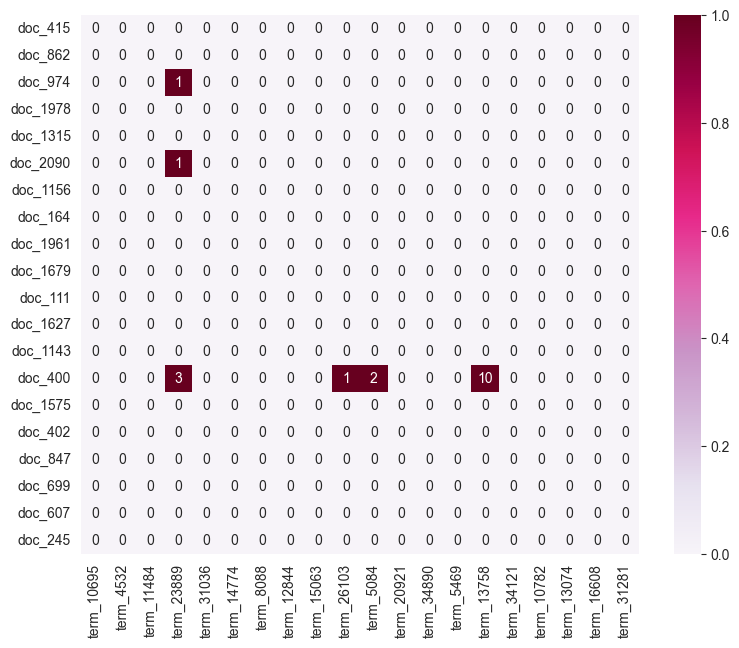

In [22]:
import seaborn as sns
import random

# choose the data radomly
num_terms = min(20, len(count_vect.get_feature_names_out()))
num_docs = min(20, len(X))
plot_x_indices = random.sample(range(len(count_vect.get_feature_names_out())), num_terms)
plot_y_indices = random.sample(range(len(X)), num_docs)


plot_x = ["term_" + str(i) for i in plot_x_indices]
plot_y = ["doc_" + str(i) for i in plot_y_indices]

plot_z = text_matrix[plot_y_indices, :][:, plot_x_indices].toarray()
#plot_z_normalized = plot_z / plot_z.max()

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)
plt.show()

#### Exercise 12

In [23]:
import numpy as np

term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0]

134

In [24]:
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = "browser"
fig = go.Figure(
    data=[
        go.Bar(
            x=count_vect.get_feature_names_out()[:300],
            y=term_frequencies[:300]
        )
    ]
)

fig.update_layout(
    title="Term Frequencies",
    xaxis_title="Terms",
    yaxis_title="Frequency",
    xaxis_tickangle=90,
    height=800,
    width=1500)

fig.show()


#### Exercise 13

In [25]:
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = "browser"
N = 50  # Set N to a smaller number for efficiency
indices = np.argsort(term_frequencies)[-N:][::-1] 

fig.update_layout(
    title="Term Frequencies",
    xaxis_title="Terms",
    yaxis_title="Frequency",
    xaxis_tickangle=90,
    height=800,
    width=1500)

fig.show()


#### Exercise 14

In [26]:
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = "browser"
N = 50  # Set N to a smaller number for efficiency
indices = np.argsort(term_frequencies)[-N:][::-1]

# Create a bar chart with Plotly
fig = go.Figure(
    data=[
        go.Bar(
            x=[count_vect.get_feature_names_out()[i] for i in indices],
            y=[term_frequencies[i] for i in indices],
            marker=dict(
                color='rgba(255, 255, 102, 0.6)',  # Fill color
                line=dict(color='rgba(0, 0, 0, 1.0)', width=2)  # Outline color and width
            )
        )
    ]
)


fig.update_layout(
    title="top Term Frequencies",
    xaxis_title="Terms",
    yaxis_title="Frequency",
    xaxis_tickangle=90,
    height=800,
    width=1500)

fig.show()

/var/folders/6s/ml8d1fzs5wv4kr9zt85ggq0m0000gn/T/ipykernel_97132/1190816637.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



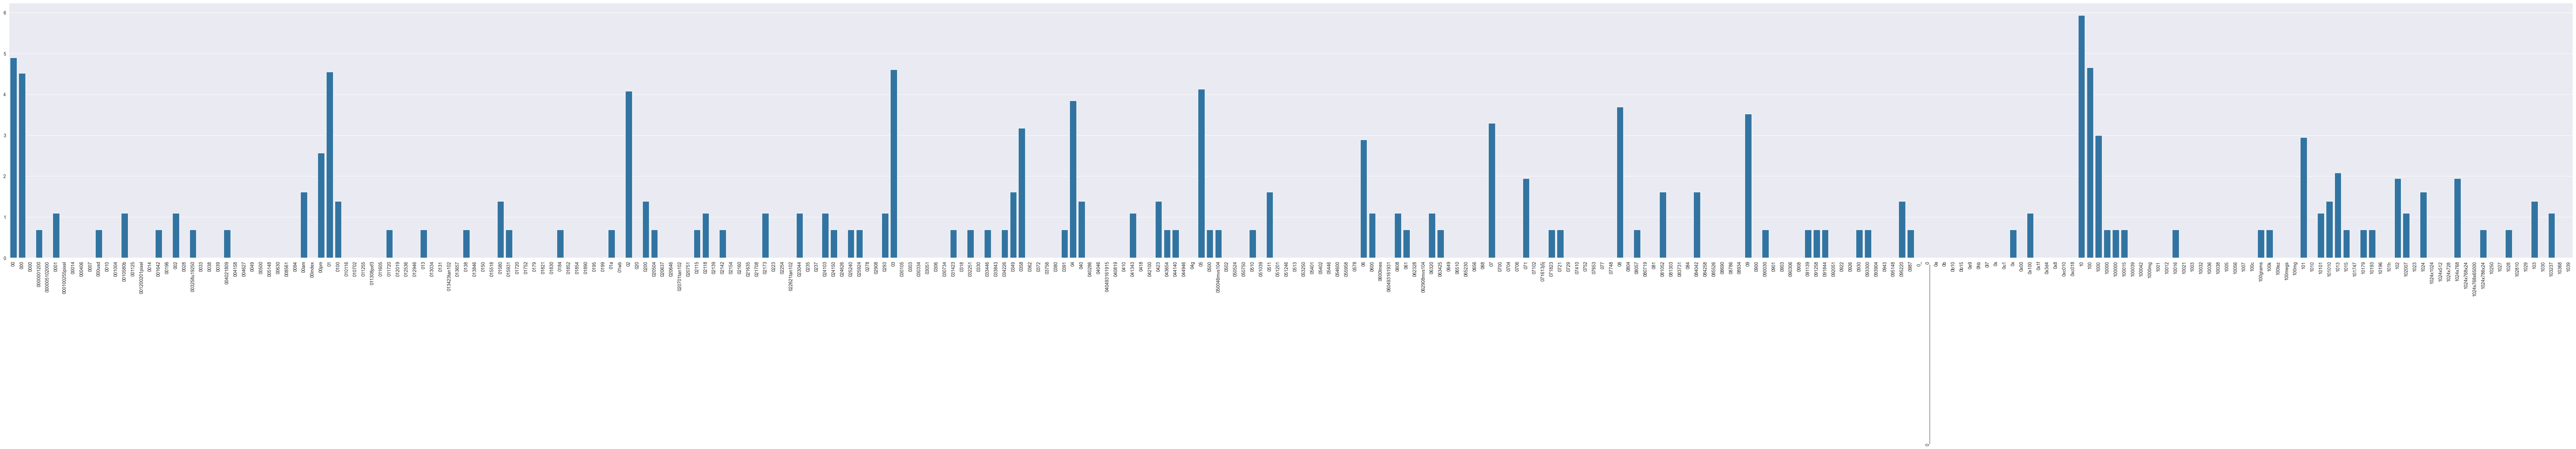

In [27]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### Exercise 15

In [28]:
import plotly.graph_objects as go
import plotly.io as pio

term_frequencies_log = [math.log(i) for i in term_frequencies]


pio.renderers.default = "browser"
fig = go.Figure(
    data=[
        go.Bar(
            x=count_vect.get_feature_names_out()[:300],
            y=term_frequencies_log[:300]
        )
    ]
)

fig.update_layout(
    title="Term Frequencies",
    xaxis_title="Terms",
    yaxis_title="Frequency",
    xaxis_tickangle=90,
    height=800,
    width=1500)

fig.show()

### Finding frequent patterns

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

#### Exercise 16 (take home)    

top5 出現的詞語通常在英文試教無意義的連接詞或是助詞（就像是:the, to, is...），如果以中文來說，可能會是我、是等詞語，因此若是可以刪掉這些無意義的詞語，可以使資料分析更加完善。

In [30]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


For category comp.graphics we filter the following words:
Bottom 1.0% words: 
initworld    1
jkpg         1
jiu1         1
jiu          1
jfreund      1
            ..
lab2         1
laaksone     1
l4v          1
l300         1
l14h11       1
Length: 137, dtype: int64
Top 5.0% words: 
40               27
distributed      27
open             27
multi            27
getting          27
               ... 
is             1751
and            2382
of             2470
to             2775
the            4537
Length: 687, dtype: int64

For category soc.religion.christian we filter the following words:
Bottom 1.0% words: 
disparate       1
expose          1
explosive       1
resisting       1
exploitation    1
               ..
fence           1
feminist        1
remarriage      1
remarried       1
remeber         1
Length: 138, dtype: int64
Top 5.0% words: 
pagan        36
claims       36
gave         36
parts        36
jr           37
          ...  
that       4393
and        4409
to        

,000,000005102000,000100255pixel,0007,000usd,0010580b,001200201pixel,00196,002,0028,...,zorn,zrz,zsoft,zt,zug,zurich,zvi,zyeh,zyxel,ªl
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
output_path = '/Users/aping/PycharmProjects/DM2024-Lab1/Lab1 Handout/DM2024-Lab1-Homework/twentynews_csv'

In [32]:
from PAMI.extras.convert import denseDF2DB as db

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional databa
    # se
    obj = db.denseDF2DB(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'{output_path}/td_freq_db_{category_safe}.csv', '>=', 1)

Database size (total no of transactions) : 584
Number of items : 12932
Minimum Transaction Size : 4
Average Transaction Size : 56.41267123287671
Maximum Transaction Size : 2063
Standard Deviation Transaction Size : 152.5206450557005
Variance in Transaction Sizes : 23302.44862132569
Sparsity : 0.995637745806304


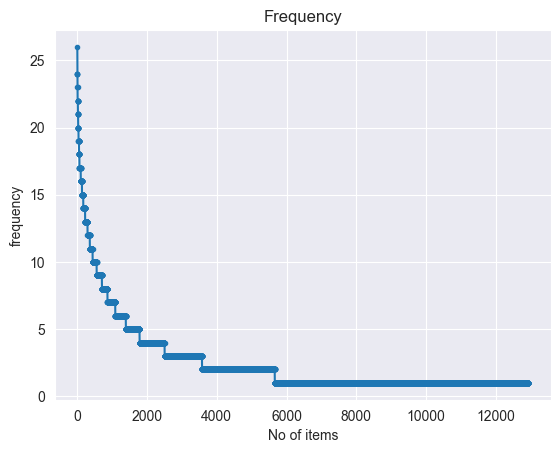

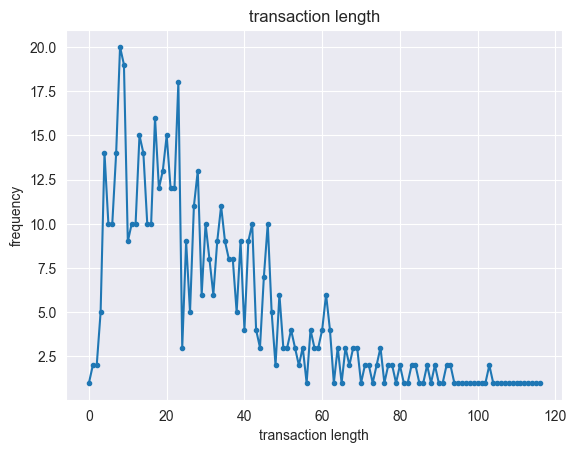

In [33]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase(f'{output_path}/td_freq_db_comp_graphics.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 594
Number of items : 15283
Minimum Transaction Size : 9
Average Transaction Size : 74.55892255892256
Maximum Transaction Size : 1070
Standard Deviation Transaction Size : 115.43440452043433
Variance in Transaction Sizes : 13347.572407606134
Sparsity : 0.9951214471923757


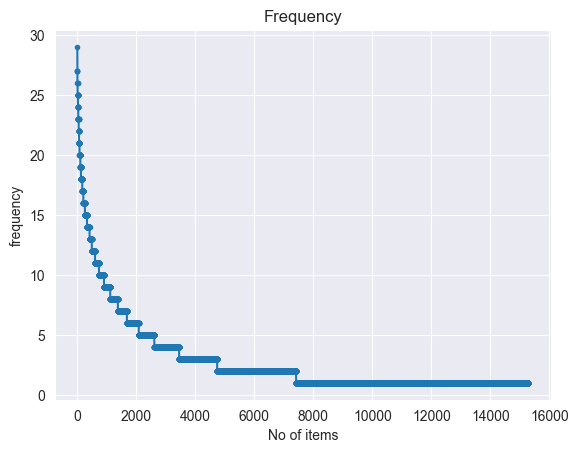

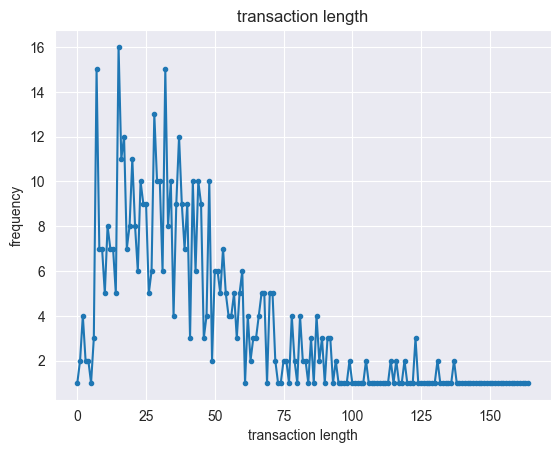

In [34]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase(f'{output_path}/td_freq_db_sci_med.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 599
Number of items : 13041
Minimum Transaction Size : 2
Average Transaction Size : 77.04507512520868
Maximum Transaction Size : 460
Standard Deviation Transaction Size : 62.384260554199
Variance in Transaction Sizes : 3898.3039849023735
Sparsity : 0.9940920884038641


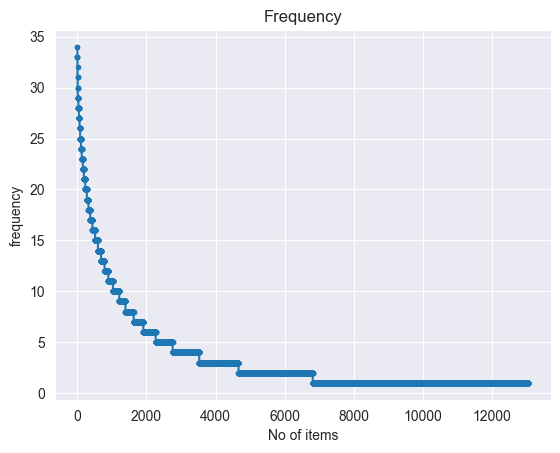

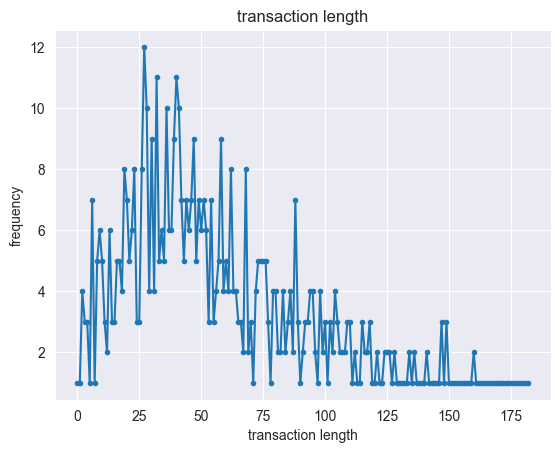

In [35]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase(f'{output_path}/td_freq_db_soc_religion_christian.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 480
Number of items : 11250
Minimum Transaction Size : 5
Average Transaction Size : 75.59791666666666
Maximum Transaction Size : 1395
Standard Deviation Transaction Size : 105.33869380396925
Variance in Transaction Sizes : 11119.405841162143
Sparsity : 0.9932801851851852


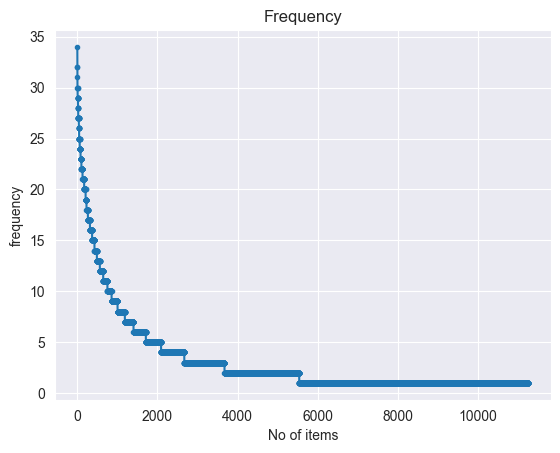

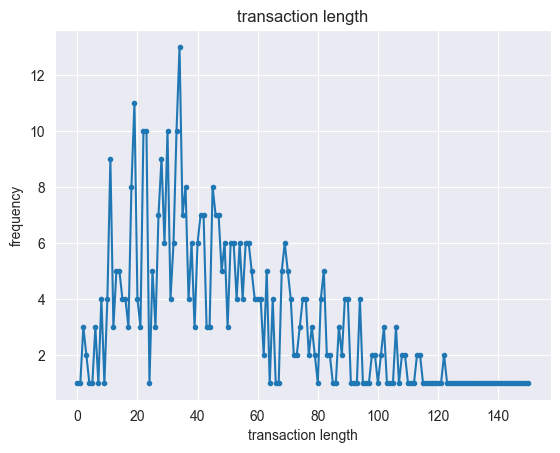

In [36]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase(f'{output_path}/td_freq_db_alt_atheism.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [37]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile=f'{output_path}/td_freq_db_sci_med.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 10000
Runtime: 0.1376180648803711


In [38]:
obj1.save(f'{output_path}/freq_patterns_sci_med_minSup9.txt') #save the patterns
frequentPatternsDF_sci_med

,Patterns,Support
0,leave,9
1,swell,9
2,color,9
3,confused,9
4,learning,9
...,...,...
9995,means,27
9996,haven,27
9997,happen,27
9998,originator,27


In [39]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile=f'{output_path}/td_freq_db_alt_atheism.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_alt_atheism))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 4676
Runtime: 0.19873690605163574


In [40]:
obj2.save(f'{output_path}/freq_patterns_alt_atheism_minSup9.txt') #save the patterns
frequentPatternsDF_alt_atheism

,Patterns,Support
0,choices,9
1,corp,9
2,hausmann,9
3,hausmann maddi,9
4,kids,9
...,...,...
4671,date,31
4672,date gmt,19
4673,stay,32
4674,snm6394,32


In [41]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile=f'{output_path}/td_freq_db_comp_graphics.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 33574
Runtime: 0.1383991241455078


In [42]:
obj3.save(f'{output_path}/freq_patterns_comp_graphics_minSup9.txt') #save the patterns
frequentPatternsDF_comp_graphics

,Patterns,Support
0,individual,9
1,certain,9
2,hall,9
3,mike,9
4,vr,9
...,...,...
33569,life,24
33570,ideas,24
33571,feel,24
33572,tried,24


In [43]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj4 = alg.FPGrowth(iFile=f'{output_path}/td_freq_db_soc_religion_christian.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_soc_religion_christian= obj4.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_soc_religion_christian))) #print the total number of patterns
print('Runtime: ' + str(obj4.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 11213
Runtime: 0.2536771297454834


In [44]:
obj4.save(f'{output_path}/freq_patterns_soc_religion_minSup9.txt') #save the patterns
frequentPatternsDF_soc_religion_christian

,Patterns,Support
0,latest,9
1,san,9
2,seven,9
3,schools,9
4,chose,9
...,...,...
11208,34,33
11209,institute,33
11210,ways,33
11211,oh,34


In [45]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_soc_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                        Patterns  Support
19911                        gov       33
19912                  institute       33
57158                    snm6394       32
19910                       form       31
57156                    deleted       30
...                          ...      ...
54045  axes funds motss matching        9
54044   boy funds motss matching        9
54043    boy axes motss matching        9
54042    et funds motss matching        9
0                          swell        9

[57159 rows x 2 columns]
Number of patterns discarded: 2304


In [46]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,0000,0000001200,000005102000,0001,000100255pixel,00014,000406,0007,...,soc princeton funds motss matching,soc princeton boy motss matching,et axes motss matching,soc princeton et motss matching,soc princeton al motss matching,axes funds motss matching,boy funds motss matching,boy axes motss matching,et funds motss matching,swell
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Exercise 17

In [47]:
from PAMI.frequentPattern.topk import FAE

k = 9  # Example value, adjust it as needed
faetry = FAE.FAE(iFile=f'{output_path}/td_freq_db_comp_graphics.csv', k=k)
faetry.mine()
frequentfae_comp_graphics = faetry.getPatternsAsDataFrame()

print('Total No of patterns: ' + str(len(frequentfae_comp_graphics)))  # Print the total number of patterns
print('Runtime: ' + str(faetry.getRuntime()))  # Print runtime

faetry.save(f'{output_path}/freq_patterns_comp_graphics_minSup9.txt')

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 9
Runtime: 0.025161027908325195


In [48]:
# MaxFPGGrowth
from PAMI.frequentPattern.maximal import MaxFPGrowth

minSup = 9
maxtry = MaxFPGrowth.MaxFPGrowth(iFile=f'{output_path}/td_freq_db_comp_graphics.csv', minSup=minSup )
maxtry.mine()
frequentmax_comp_graphics = maxtry.getPatternsAsDataFrame()

print('Total No of patterns: ' + str(len(frequentmax_comp_graphics)))  # Print the total number of patterns
print('Runtime: ' + str(maxtry.getRuntime()))  # Print runtime

maxtry.save(f'{output_path}/freq_patterns_comp_graphics_minSup9.txt')  # Save the patterns

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 660
Runtime: 0.07147693634033203


In [49]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

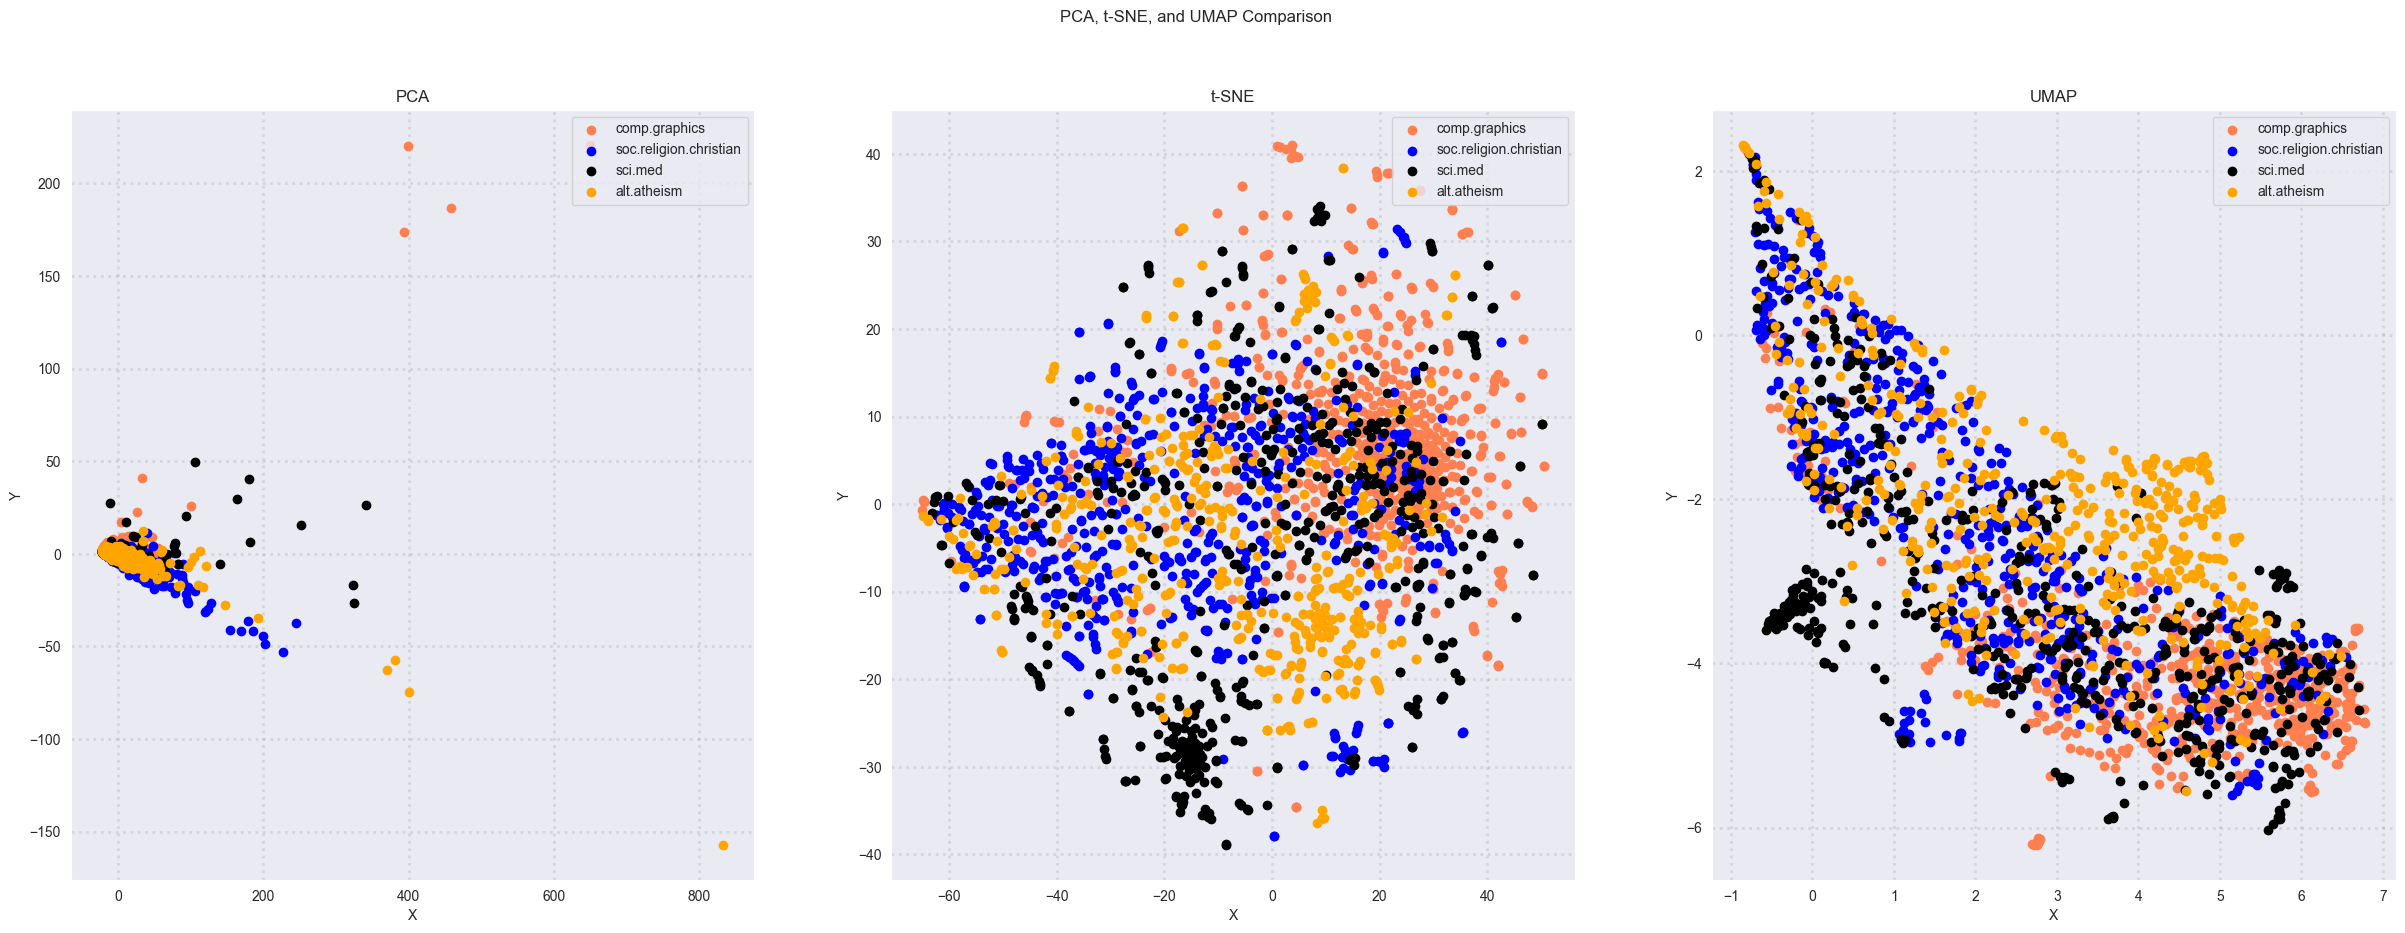

In [50]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]#不懂不懂不懂
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

2 demension

In [51]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

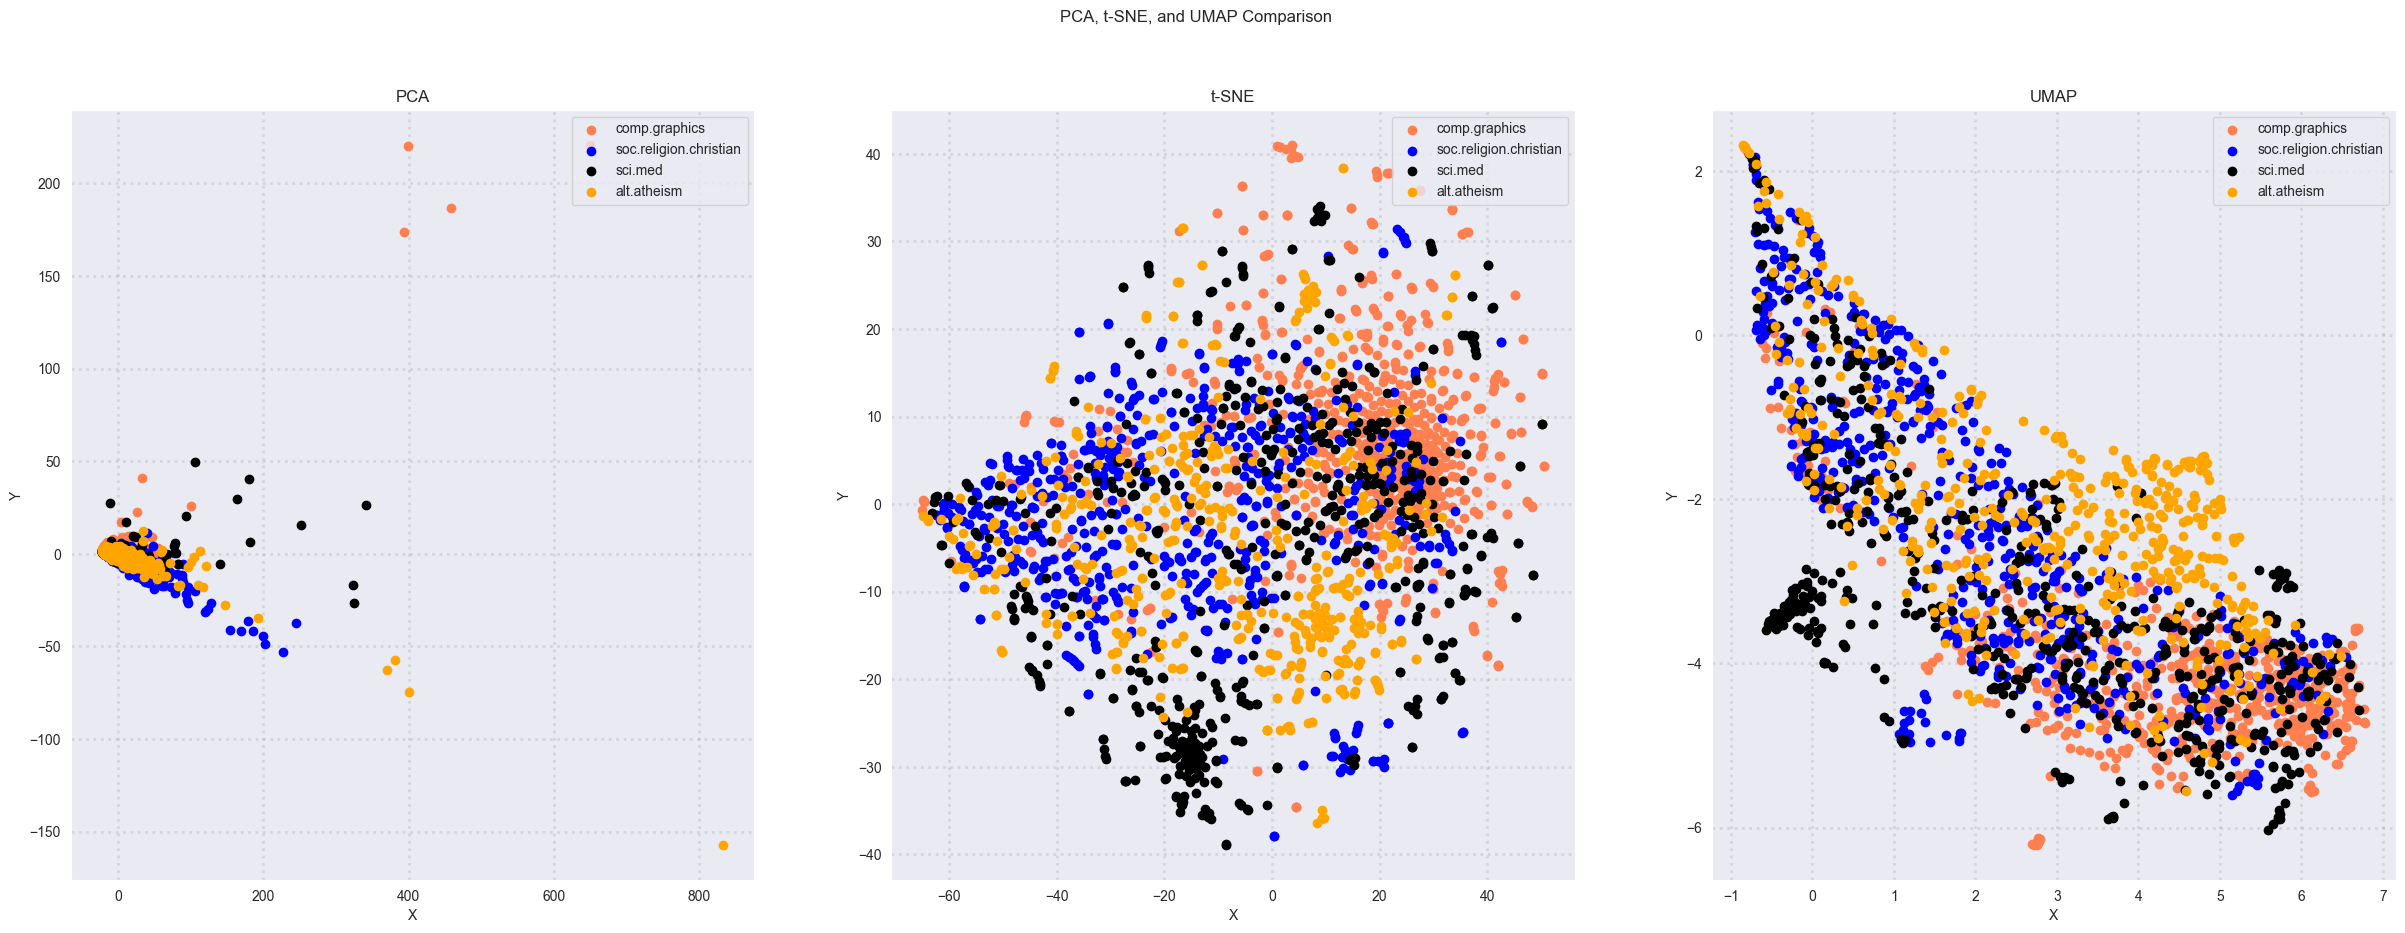

In [52]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

#### Exercise18 (3 dimension)

In [53]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug_3 = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug_3 = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug_3 = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

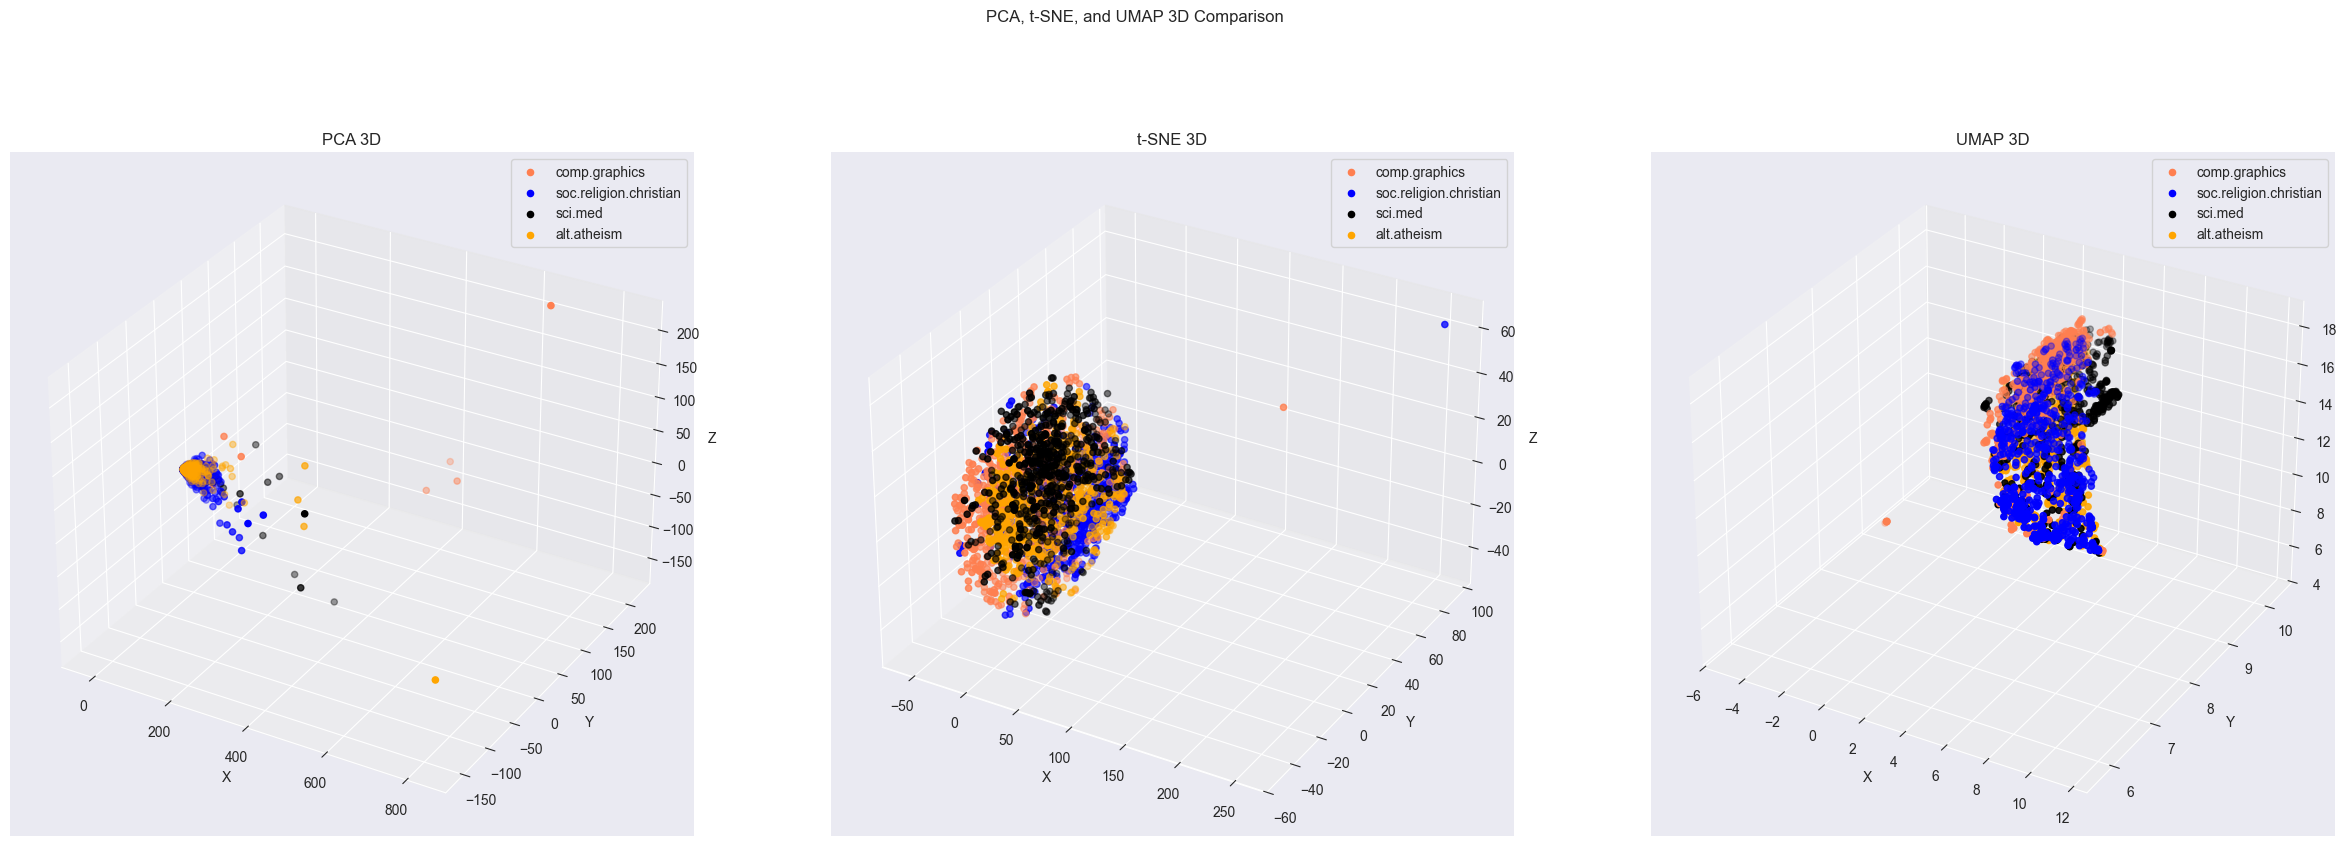

In [54]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

# 設置顏色和類別
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

fig = plt.figure(figsize=(30, 10))  # Create figure for subplots
fig.suptitle('PCA, t-SNE, and UMAP 3D Comparison') 


def plot_scatter_3d(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]  # 添加 Z 坐標
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')  # 添加 Z 軸標籤
    ax.legend(loc='upper right')


# 創建 3 個三維子圖
ax1 = fig.add_subplot(131, projection='3d')  # Create 3D subplot for PCA
plot_scatter_3d(ax1, X_pca_aug_3, 'PCA 3D')

ax2 = fig.add_subplot(132, projection='3d')  # Create 3D subplot for t-SNE
plot_scatter_3d(ax2, X_tsne_aug_3, 't-SNE 3D')

ax3 = fig.add_subplot(133, projection='3d')  # Create 3D subplot for UMAP
plot_scatter_3d(ax3, X_umap_aug_3, 'UMAP 3D')

plt.show()

In [55]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)

LabelBinarizer()

#### Exercise 19 (take home):

In [56]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
import pandas as pd
from sklearn.preprocessing import LabelBinarizer

mlb = preprocessing.LabelBinarizer()

mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

In [57]:
X[0:9]

,text,category,category_name,unigrams,tokenized_text,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","{--, Collier, Fax:, The, know, 0HB., Please, a...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","{this., divine., --, The, B., know, Sciences, ...","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","{please, due, boss,, realize, an, affect, I've...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","{concerning, tell, at, Organization:, more, ca...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","{wear, When, Like, 'Go, The, tells, find, a, t...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","{>A, infallible., Indeed,, --, life, ""Bullwink...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","{feelings,, action, sure, know, anger, The, st...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","{clearasil., an, his, cap., >is, I've, eating,...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","{color, 2, --, sensitive,, >This, kinds, N3JXP...","[0, 0, 1, 0]"
